In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd

In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ebb505/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
# Set filepath
CONTROLLERREPOSITORY='/home/ebb505/ARE_Project/are-logs/SegmentedRobots/'
MORPHOLOGYREPOSITORY='/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/'
IFILEFITNESSES='fitnesses.csv'
IFILEDESCRIPTORS='MD_Cart_WDH.csv'
IFILEROBOTLIST='CLRNrobotList.csv'
OFILE='robotsTarget.csv'
print('Filepath: ' + CONTROLLERREPOSITORY)

Filepath: /home/ebb505/ARE_Project/are-logs/SegmentedRobots/


In [3]:
# Get all directories
controllers_folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(CONTROLLERREPOSITORY):
    for folder in d:
        controllers_folders.append(os.path.join(r, folder))
        #print(folder)
print("Folders: ", len(controllers_folders))
controllers_folders.sort()
#print(controllers_folders)
morphologies_folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(MORPHOLOGYREPOSITORY):
    for folder in d:
        morphologies_folders.append(os.path.join(r, folder))
        #print(folder)
print("Folders: ", len(morphologies_folders))
morphologies_folders.sort()
print(controllers_folders)
print(morphologies_folders)

Folders:  1
Folders:  16
['/home/ebb505/ARE_Project/are-logs/SegmentedRobots/lc_nsms_16_10_12-8-48-8133-2255506869']
['/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/A', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/B', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/C', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/D', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/E', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/F', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/G', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/H', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/I', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/K', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/L', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/M', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/N', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/P', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/R', '/home/ebb505/ARE_Project/are-logs/EvTraitMiddle/S']


In [4]:
# Get fitness data
my_fitnesses = []
for f in controllers_folders:
    my_list = []
    with open(f + '/' + IFILEFITNESSES, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[3:-1]) # Last character is empty for some reason
    my_fitnesses.append(my_list)
# Descriptors
my_descriptors = []
for f in morphologies_folders:
    my_list = []
    with open(f + '/' + IFILEDESCRIPTORS, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_descriptors.append(my_list)
# Robot list
my_robotList = []
for f in morphologies_folders:
    my_list = []
    with open(f + '/' + IFILEROBOTLIST, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[0]) # Last character is empty for some reason
    my_robotList.append(my_list)

In [5]:
# Estimate data and set parameters
#CTRLREP = len(my_fitnesses)
CTRLREP = 1
GENERATIONS = len(my_fitnesses[0])
CTRLEVALUATIONS = len(my_fitnesses[0][0])
CTRLEVAL = 100
print("Ctrl rep: ", CTRLREP, "Generations: ", GENERATIONS, "Population: ", CTRLEVALUATIONS)
MORPHREP = 1
#MORPHREP = len(my_descriptors)
MORPHEVALUATIONS = 30000
print("Morph rep: ", MORPHREP)

Ctrl rep:  14 Generations:  18 Population:  25
Morph rep:  14


In [6]:
# Process data - fitnesses
rep_fitnesses = []
for rep in range(CTRLREP):
    tempDat = []
    tempDat = np.array([[float(y) for y in x] for x in my_fitnesses[rep]]) # Convert to array
    rep_fitnesses.append(tempDat)
print("Done!")
# Process data - descritors
rep_descriptors = []
for rep in range(MORPHREP):
    tempDat = []
    tempDat = np.array([[float(y) for y in x] for x in my_descriptors[rep]]) # Convert to array
    rep_descriptors.append(tempDat)
print("Done!")
# Process data - robot list
rep_robotlist = []
for rep in range(MORPHREP):
    tempDat = []
    tempDat = np.array([int(y) for y in my_robotList[rep]]) # Convert to array
    rep_robotlist.append(tempDat)
print("Done!")

IndexError: list index out of range

In [32]:
# Extract fitnesses
dat_fitnesses =[]
for rep in range(CTRLREP):
    tempData =[]
    for i in range(int(CTRLEVALUATIONS/CTRLEVAL)):
        tempData.append(rep_fitnesses[rep][0][(i*CTRLEVAL):(i*CTRLEVAL)+CTRLEVAL])  
    dat_fitnesses.append(tempData)

In [33]:
# Extraxt max, median, mean
rep_max = []
for rep in range(CTRLREP):
    tempData =[]
    for i in range(int(CTRLEVALUATIONS/CTRLEVAL)):
        tempData.append(np.max(dat_fitnesses[rep][i]))
    rep_max.append(tempData)

In [34]:
# Extraxt max, median, mean
# .95
# .91 - 0.25m
# 0.82 - 0.50m
# 0.735 - 0.75
rep_zerothreshold = []
rep_firstthreshold = []
rep_secondthreshold = []
rep_thirdthreshold = []
for rep in range(CTRLREP):
    temp = np.array([float(y) for y in rep_max[rep]])
    rep_zerothreshold.append(len(temp[temp>0.91]))
    rep_firstthreshold.append(len(temp[temp>0.91]))
    rep_secondthreshold.append(len(temp[temp>0.82]))
    rep_thirdthreshold.append(len(temp[temp>0.735]))
print(np.median(rep_zerothreshold), " ", np.std(rep_zerothreshold))
print(np.median(rep_firstthreshold), " ", np.std(rep_firstthreshold))
print(np.median(rep_secondthreshold), " ", np.std(rep_secondthreshold))
print(np.median(rep_thirdthreshold), " ", np.std(rep_thirdthreshold))

0.0   0.25753937681885636
0.0   0.25753937681885636
0.0   0.34992710611188266
3.5   0.9715336077668174


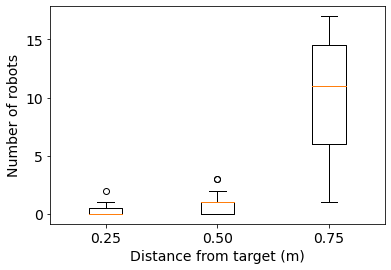

In [10]:
font = {'weight' : 'normal',
            'size'   : 14.0}
plt.rc('font', **font)
plt.figure(0)

plt.boxplot([rep_firstthreshold,rep_secondthreshold,rep_thirdthreshold])
plt.xlabel('Distance from target (m)')
plt.ylabel('Number of robots')
plt.xticks([1, 2, 3], ['0.25', '0.50', '0.75'])
plt.savefig(CONTROLLERREPOSITORY+'boxplot.png',dpi=200, bbox_inches='tight')

In [11]:
# Plot max robots
for rep in range(CTRLREP):
    font = {'weight' : 'normal',
            'size'   : 14.0}
    plt.rc('font', **font)
    plt.figure(0)
    plt.title('Empty room')
    plt.xlabel('Robots in the population')
    plt.ylabel('Distance (m)')
    plt.plot(rep_max[rep],'k.')
    #plt.plot(robotMax,'k.', markersize=8)
    plt.text(50, 0.92, '0.25', fontsize=12, horizontalalignment='center')
    plt.plot([0,100],[0.91,0.91],'k--')
    plt.text(50, 0.83, '0.50', fontsize=12, horizontalalignment='center')
    plt.plot([0,100],[0.82,0.82],'k--')
    plt.text(50, 0.74, '0.75', fontsize=12, horizontalalignment='center')
    plt.plot([0,100],[0.735,0.735],'k--')
    # Escape room and empty room
    plt.text(50, 0.65, 'Starting Position', fontsize=12, horizontalalignment='center')
    plt.plot([0,100],[0.69,0.69],'k--')
    # Middle wall
#     plt.text(50, 0.62, 'Starting Position', fontsize=12, horizontalalignment='center')
#     plt.plot([0,100],[0.65,0.65],'k--')
   
    plt.ylim([0.6, 1.0])
    #plt.yticks([0.4, 0.6, 0.8, 1.0], ['1.1', '1.7', '2.2', '2.83'])
    plt.yticks([0.6, 0.8, 1.0], ['1.1', '0.6', '0.0'])
    plt.xticks([1, 20, 40, 60, 80, 100], ['1st','20th', '40th', '60th', '80th', '100th'])
    plt.savefig(controllers_folders[rep]+'/bootstrapViability.png',dpi=200, bbox_inches='tight')
    plt.close()

In [12]:
# Get robots 
rep_max_list = []
for rep in range(CTRLREP):
    robotMaxArray = np.array([float(y) for y in rep_max[rep]])
    temp = robotMaxArray>0.735
    robotsPassing = []
    for i in range(len(rep_max[rep])):
        if(temp[i]):
            robotsPassing.append(i)
    rep_max_list.append(robotsPassing)
#print(rep_max_list)

In [13]:
# NOTE! CHECK THE ORDER OF DIRECTORIES
rep_robotsOrgans = []
for rep in range(CTRLREP):
    robotsOrgans = []
    for i in range(len(rep_max_list[rep])):
        temp = []
        temp.append(rep_descriptors[rep][rep_robotlist[rep][rep_max_list[rep][i]],5] * 10 / 2)
        temp.append(rep_descriptors[rep][rep_robotlist[rep][rep_max_list[rep][i]],6] * 10 / 2)
        temp.append(rep_descriptors[rep][rep_robotlist[rep][rep_max_list[rep][i]],7] * 10 / 2)
        temp.append(rep_descriptors[rep][rep_robotlist[rep][rep_max_list[rep][i]],8] * 10 / 2)
        robotsOrgans.append(temp)
    #print(robotsOrgans)
    tempWheels = np.zeros(5)
    tempSensors = np.zeros(5)
    tempJoints = np.zeros(5)
    tempCaster = np.zeros(5)
    for i in range(len(rep_max_list[rep])):
        for j in range(5):
            if(robotsOrgans[i][0] == j):
                tempWheels[j] = tempWheels[j] + 1
            if(robotsOrgans[i][1] == j):
                tempSensors[j] = tempSensors[j] + 1
            if(robotsOrgans[i][2] == j):
                tempJoints[j] = tempJoints[j] + 1
            if(robotsOrgans[i][3] == j):
                tempCaster[j] = tempCaster[j] + 1
    rep_robotsOrgans.append(tempWheels)

In [14]:
print(rep_robotsOrgans)

[array([ 0., 10.,  1.,  0.,  0.]), array([2., 9., 1., 0., 0.]), array([ 0., 14.,  1.,  1.,  0.]), array([0., 6., 0., 0., 0.]), array([0., 0., 1., 0., 0.]), array([ 0., 11.,  2.,  1.,  0.]), array([1., 8., 2., 0., 0.]), array([ 1., 14.,  2.,  0.,  0.]), array([0., 5., 0., 0., 0.]), array([0., 5., 1., 0., 0.]), array([1., 5., 3., 0., 0.]), array([0., 9., 4., 0., 0.]), array([1., 4., 0., 0., 0.]), array([ 1., 11.,  2.,  0.,  0.]), array([ 0., 17.,  0.,  0.,  0.])]


In [15]:
# Plot histograms
# https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html
for rep in range(CTRLREP):
    font = {'weight' : 'normal',
            'size'   : 14.0}
    plt.rc('font', **font)
    plt.figure(0)
    
    xedges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    yedges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    x = rep_descriptors[rep][rep_robotlist[rep][rep_max_list[rep]],5]
    y = rep_descriptors[rep][rep_robotlist[rep][rep_max_list[rep]],7]

    H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    H = H.T  # Let each row list bins with common y range.

    plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='cubehelix')
    plt.colorbar(label='Robots')
    X, Y = np.meshgrid(xedges, yedges)


    plt.colorbar()

    plt.xlabel('Wheels')
    plt.ylabel('Joints')
    plt.title('Empty room - No tiles - 0.75m ')
    plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
    plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
    plt.savefig(controllers_folders[rep]+'/histogram75.png',dpi=200, bbox_inches='tight')
    
    plt.close()

In [20]:
# Get robots 
# .91 - 0.25m
# 0.82 - 0.50m
# 0.735 - 0.75
rep_max_wheels = []
rep_max_joints = []
for rep in range(CTRLREP):
    robotMaxArray = np.array([float(y) for y in rep_max[rep]])
    temp = robotMaxArray>0.95
    robotsPassing = []
    for i in range(len(rep_max[rep])):
        if(temp[i]):
            robotsPassing.append(i)
            rep_max_wheels.append(rep_descriptors[rep][rep_robotlist[rep][i],5])
            rep_max_joints.append(rep_descriptors[rep][rep_robotlist[rep][i],7])

In [21]:
font = {'weight' : 'normal',
            'size'   : 14.0}
plt.rc('font', **font)
plt.figure(0)

xedges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
yedges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

x = rep_max_wheels
y = rep_max_joints

H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
H = H.T  # Let each row list bins with common y range.

for i in range(len(H)):
    for j in range(len(H[i])):
        if(H[i,j] > np.max(H)/5):
            plt.text(j/10*2+0.1, i/10*2+0.1, str(int(H[i,j])), fontsize=20, horizontalalignment='center').set_color('White')
        else:
            plt.text(j/10*2+0.1, i/10*2+0.1, str(int(H[i,j])), fontsize=20, horizontalalignment='center').set_color('Black')
                

plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Greys')
plt.colorbar(label='Robots')
X, Y = np.meshgrid(xedges, yedges)


plt.xlabel('Wheels')
plt.ylabel('Joints')
#plt.title('Empty arena - 0.12m ')
#plt.title('Escape room - 0.50m ')
plt.title('Middle wall - 0.12m ')
#plt.title('All robots')
plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
plt.savefig(CONTROLLERREPOSITORY+'wheels12Middle.png',dpi=200, bbox_inches='tight')

plt.close()

In [29]:
# Get robots 
import imageio
import moviepy.editor as mp
images = []
for fr in range(60,100,5):
    rep_max_wheels = []
    rep_max_joints = []
    for rep in range(CTRLREP):
        robotMaxArray = np.array([float(y) for y in rep_max[rep]])
        temp = robotMaxArray>(fr/100)
        robotsPassing = []
        for i in range(len(rep_max[rep])):
            if(temp[i]):
                robotsPassing.append(i)
                rep_max_wheels.append(rep_descriptors[rep][rep_robotlist[rep][i],5])
                rep_max_joints.append(rep_descriptors[rep][rep_robotlist[rep][i],7])
    font = {'weight' : 'normal',
                'size'   : 14.0}
    plt.rc('font', **font)
    plt.figure(0)

    xedges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
    yedges = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    x = rep_max_wheels
    y = rep_max_joints

    H, xedges, yedges = np.histogram2d(x, y, bins=(xedges, yedges))
    H = H.T  # Let each row list bins with common y range.
    
    for i in range(len(H)):
        for j in range(len(H[i])):
            if(H[i,j] > np.max(H)/5):
                plt.text(j/10*2+0.1, i/10*2+0.1, str(int(H[i,j])), fontsize=20, horizontalalignment='center').set_color('White')
            else:
                plt.text(j/10*2+0.1, i/10*2+0.1, str(int(H[i,j])), fontsize=20, horizontalalignment='center').set_color('Black')

    plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='Greys')
    plt.colorbar(label='Robots')
    X, Y = np.meshgrid(xedges, yedges)


    plt.xlabel('Wheels')
    plt.ylabel('Sensors')
    
    plt.title('Empty room - No tiles - {0:.2f}'.format((1-(fr/100))*2.83)+'m')
    #plt.title('Escape room - No tiles - {0:.2f}'.format((1-(fr/100))*2.83)+'m')
    #plt.title('Middle wall - No tiles - {0:.2f}'.format((1-(fr/100))*2.83)+'m')
    
    plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
    plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9], ['0', '1', '2', '3', '4'])
    
    frame = CONTROLLERREPOSITORY + 'frame' + str(fr) + ".png"
    plt.savefig(frame,dpi=200, bbox_inches='tight')
    images.append(imageio.imread(frame))

    plt.close()
# Save gif and video
gifName = "frameWheels.gif"
imageio.mimsave(CONTROLLERREPOSITORY + gifName, images, duration = 2.0)
clip = mp.VideoFileClip(CONTROLLERREPOSITORY + gifName)
videoName = "frameWheels.mp4"
clip.write_videofile(CONTROLLERREPOSITORY + videoName)
# Delete files
gifName = "frame.gif"
# if os.path.exists(CONTROLLERREPOSITORY + gifName):
#   os.remove(CONTROLLERREPOSITORY + gifName)
# else:
#   print("The file does not exist")
for fr in range(60,100,5):
    frameName = CONTROLLERREPOSITORY + 'frame' + str(fr) + ".png"
    if os.path.exists(frameName):
      os.remove(frameName)
    else:
      print("The file does not exist")

Moviepy - Building video /home/ebb505/ARE_Project/are-logs/temp_1012/frameWheels.mp4.
Moviepy - Writing video /home/ebb505/ARE_Project/are-logs/temp_1012/frameWheels.mp4

Moviepy - Done !
Moviepy - video ready /home/ebb505/ARE_Project/are-logs/temp_1012/frameWheels.mp4
